In [ ]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# path = 'https://github.com/facebook/prophet/blob/master/examples/example_wp_log_peyton_manning.csv'
path = 'C:/users/hvu7470/hcapy/data/sunspots.txt'
df = pd.read_csv(path,sep='\t',header=None)
df = df.iloc[:,1].to_frame().copy(deep=True)
df.columns = ['temp']
df.shape
df.columns
df.head()

(3143, 1)

Index(['temp'], dtype='object')

,temp
0,58.0
1,62.6
2,70.0
3,55.7
4,85.0


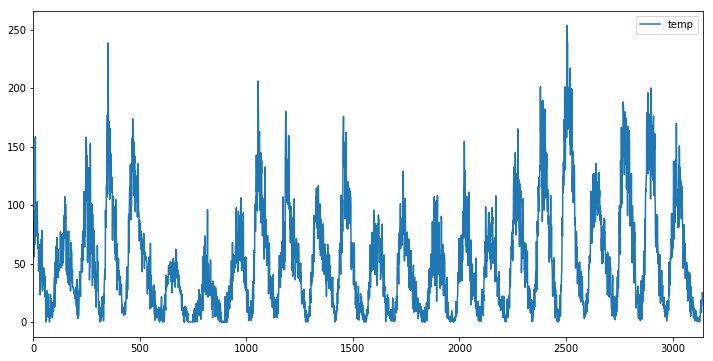

In [3]:
df.plot(figsize=(12,6))

In [9]:
from sklearn.ensemble import IsolationForest
model = IsolationForest(behaviour='new',contamination=.005,random_state=42)
X = df.temp.values.reshape(-1, 1)
model.fit(X)
df['normal'] = model.predict(X)

IsolationForest(behaviour='new', bootstrap=False, contamination=0.005,
        max_features=1.0, max_samples='auto', n_estimators=100,
        n_jobs=None, random_state=42, verbose=0)

In [5]:
df.head()
df.normal.value_counts()

,temp,normal
0,58.0,1
1,62.6,1
2,70.0,1
3,55.7,1
4,85.0,1


 1    2675
-1     468
Name: normal, dtype: int64

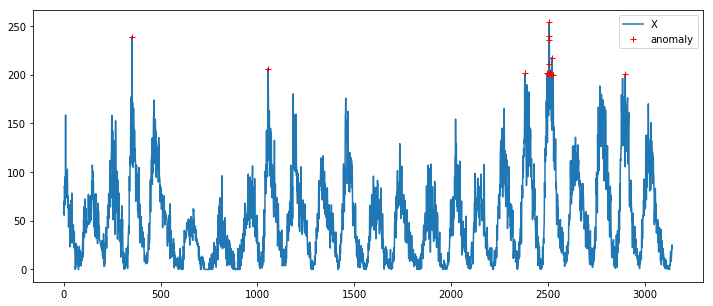

In [10]:
fig = plt.figure(figsize=(12,5))
plt.plot(X,label='X')
plt.plot(df[df.normal!=1].temp,'r+',label='anomaly')
plt.legend()

## Stock price

In [30]:
df = pd.read_csv('C:/Users/hvu7470/Downloads/HCA.csv')
df.head()
df.shape

,Date,Open,High,Low,Close,Adj Close,Volume
0,2011-03-07,31.200001,31.500000,30.500000,31.120001,24.494720,74131500
1,2011-03-14,30.959999,33.080002,30.360001,33.060001,26.021708,30738500
2,2011-03-21,33.389999,33.389999,31.389999,32.950001,25.935125,17135900
3,2011-03-28,32.869999,34.570000,32.750000,33.740002,26.556940,14067800
4,2011-04-04,33.869999,34.200001,32.849998,33.169998,26.108286,13260300


(430, 7)

In [21]:
df['Date'] = pd.to_datetime(df.Date)

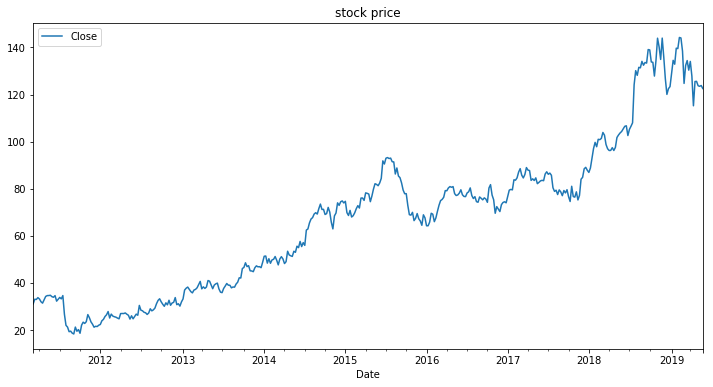

In [23]:
df.plot(x='Date',y='Close',figsize=(12,6),title='stock price')

IsolationForest(behaviour='new', bootstrap=False, contamination=0.1,
        max_features=1.0, max_samples='auto', n_estimators=100,
        n_jobs=None, random_state=42, verbose=0)

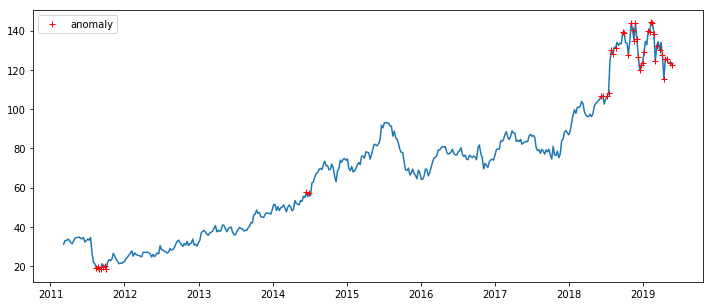

In [29]:
model = IsolationForest(behaviour='new',contamination=.1,random_state=42)
X = df.Close.values.reshape(-1, 1)
model.fit(X)
df['normal'] = model.predict(X)
fig = plt.figure(figsize=(12,5))
plt.plot(df.Date,X)
plt.plot(df[df.normal!=1].Date,df[df.normal!=1].Close,'r+',label='anomaly')
plt.legend()

In [ ]:
# from fbprophet import Prophet

In [137]:
from keras.layers.core import Dense, Activation, Dropout
from keras.layers.recurrent import LSTM
from keras.models import Sequential
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

window_size = 8

def genLSTM(series):
    # series = df.Close
    scaler = MinMaxScaler(feature_range=(-1, 1))
    scaled = scaler.fit_transform(series.values.reshape(-1,1))
    series = pd.DataFrame(scaled)

    series_s = series.copy()
    for i in range(window_size):
        series = pd.concat([series, series_s.shift(-(i+1))], axis = 1)

    series.dropna(axis=0, inplace=True)
    # series.shape

    #split
    train_X = series.values[:,:-1]
    # test_X = series.values[cutoff:,:-1]
    # train_X.shape

    #reshape to 3d as req'd by lstm
    train_X = train_X.reshape(train_X.shape[0],train_X.shape[1],1)
    # test_X = test_X.reshape(test_X.shape[0],test_X.shape[1],1)

    train_y = series.values[:,-1]
    # test_y = series.values[cutoff:,-1]

    # train_X.shape
    # train_y.shape

    # Define the LSTM model
    model = Sequential()
    model.add(LSTM(input_shape = (window_size,1), units= window_size, return_sequences = True))
    model.add(Dropout(0.5))
    model.add(LSTM(56))
    model.add(Dropout(0.5))
    model.add(Dense(1))
    model.add(Activation("linear"))
    model.compile(loss="mse", optimizer="adam")
    # model.summary()

    model.fit(train_X,train_y,epochs=5,validation_split=0.1)
    # ,batch_size=512)

    # preds = model.predict(test_X)
    preds = model.predict(train_X)
    preds = scaler.inverse_transform(preds)
    actuals = scaler.inverse_transform(train_y.reshape(-1,1))
    return actuals, preds
    # actuals = scaler.inverse_transform(test_y.reshape(-1,1))
    # mean_squared_error(actuals,preds)

Train on 379 samples, validate on 43 samples
Epoch 1/5
379/379 [==============================] - 6s 17ms/step - loss: 0.1525 - val_loss: 0.4518
Epoch 2/5
379/379 [==============================] - 0s 453us/step - loss: 0.0566 - val_loss: 0.2616
Epoch 3/5
379/379 [==============================] - 0s 421us/step - loss: 0.0351 - val_loss: 0.1667
Epoch 4/5
379/379 [==============================] - 0s 421us/step - loss: 0.0227 - val_loss: 0.0916
Epoch 5/5
379/379 [==============================] - 0s 458us/step - loss: 0.0172 - val_loss: 0.0617


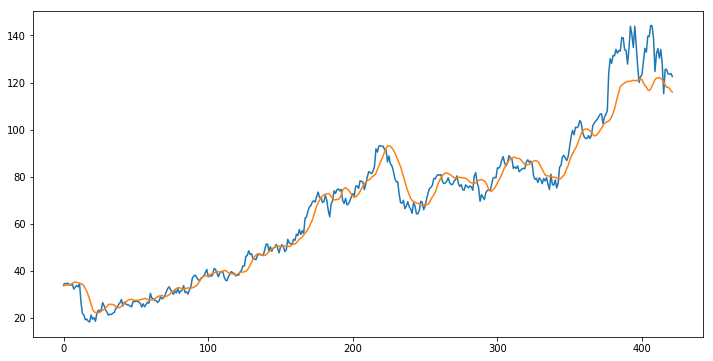

In [138]:
actuals,preds = genLSTM(df.Close)
fig = plt.figure(figsize=(12,6))
plt.plot(actuals)
plt.plot(preds)

,Date,Open,High,Low,Close,Adj Close,Volume,yhat,residual
0,2011-03-07,31.200001,31.500000,30.500000,31.120001,24.494720,74131500,NaN,NaN
1,2011-03-14,30.959999,33.080002,30.360001,33.060001,26.021708,30738500,NaN,NaN
2,2011-03-21,33.389999,33.389999,31.389999,32.950001,25.935125,17135900,NaN,NaN
3,2011-03-28,32.869999,34.570000,32.750000,33.740002,26.556940,14067800,NaN,NaN
4,2011-04-04,33.869999,34.200001,32.849998,33.169998,26.108286,13260300,NaN,NaN


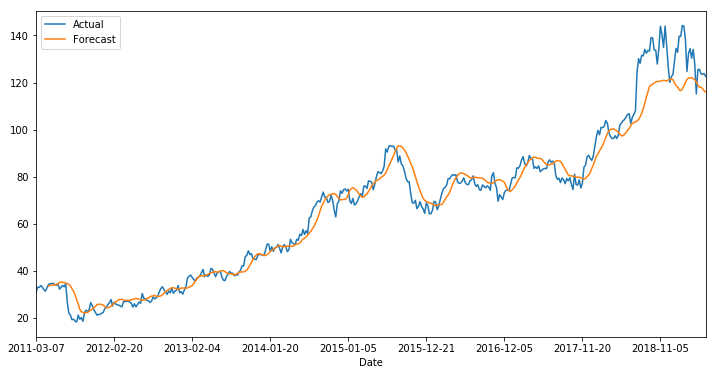

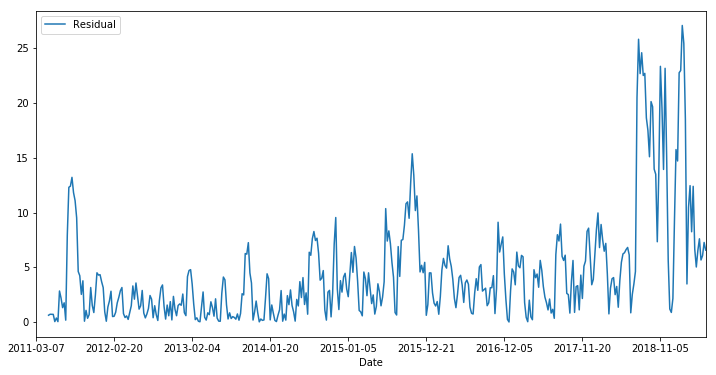

In [139]:
df['yhat'] = np.concatenate((np.full(window_size,np.nan),preds.reshape(-1)))
df['residual'] = abs(df.yhat - df.Close)
df.head()

ax = df.plot(x='Date',y='Close',label='Actual',figsize=(12,6))
df.plot(x='Date',y='yhat',ax=ax,label='Forecast')
df.plot(x='Date',y='residual',label='Residual',figsize=(12,6))

